This script aims at explore the flight radar data taken from OpenSkyNetwork Live API

In [1]:
ls

In [2]:
import pandas as pd
pd.DataFrame?

In [3]:
df = pd.read_csv("flights_over_cergy.csv")
print("Total data:", len(df))
df

Total data: 14


,timestamp,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,vertical_rate,sensors,geo_altitude,squawk,spi,position_source
0,1613378305,484351,P4AND,Kingdom of the Netherlands,1613378305,1613378305,2.0214,49.0518,13555.98,False,247.04,136.10,1.63,NaN,13555.98,5222.0,False,0
1,1613392050,4b0f8f,HBFXF,Switzerland,1613392050,1613392050,1.9962,49.0519,8229.60,False,157.04,144.33,0.00,NaN,8382.00,503.0,False,0
2,1613392075,4b0f8f,HBFXF,Switzerland,1613392075,1613392075,2.0273,49.0233,8229.60,False,156.74,144.48,0.00,NaN,8382.00,503.0,False,0
3,1613393339,4405aa,LDX7C,Austria,1613393339,1613393339,2.0234,49.0224,12496.80,False,245.15,29.69,0.00,NaN,12512.04,2321.0,False,0
4,1613393765,02001b,RAM854,Morocco,1613393764,1613393764,2.0742,49.0286,10972.80,False,236.05,24.05,0.00,NaN,11049.00,1000.0,False,0
5,1613396464,394a06,AFR006,France,1613396464,1613396464,2.0578,49.0428,3390.90,False,149.66,274.53,6.83,NaN,3528.06,NaN,False,0
6,1613396490,394a06,AFR006,France,1613396489,1613396489,2.0040,49.0456,3550.92,False,164.61,274.48,6.50,NaN,3688.08,NaN,False,0
7,1613397755,39c423,AFR688,France,1613397754,1613397754,2.0771,49.0378,3200.40,False,134.27,270.00,4.55,NaN,3329.94,NaN,False,0
8,1613397779,39c423,AFR688,France,1613397779,1613397779,2.0288,49.0375,3307.08,False,146.62,269.40,4.55,NaN,3436.62,NaN,False,0
9,1613397875,c023c5,ACA871,Canada,1613397874,1613397875,2.0354,49.0442,3870.96,False,173.92,274.58,11.70,NaN,4008.12,NaN,False,0


In [4]:
print("Duplicates:", len(df[df.duplicated(subset=['callsign'])]))
df[df.duplicated(subset=['callsign'])]

Duplicates: 4


,timestamp,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,vertical_rate,sensors,geo_altitude,squawk,spi,position_source
2,1613392075,4b0f8f,HBFXF,Switzerland,1613392075,1613392075,2.0273,49.0233,8229.60,False,156.74,144.48,0.00,NaN,8382.00,503.0,False,0
6,1613396490,394a06,AFR006,France,1613396489,1613396489,2.0040,49.0456,3550.92,False,164.61,274.48,6.50,NaN,3688.08,NaN,False,0
8,1613397779,39c423,AFR688,France,1613397779,1613397779,2.0288,49.0375,3307.08,False,146.62,269.40,4.55,NaN,3436.62,NaN,False,0
11,1613399624,48597d,TRA76X,Kingdom of the Netherlands,1613399624,1613399624,2.0824,49.0539,12192.00,False,225.95,27.38,0.00,NaN,12214.86,1000.0,False,0


In [5]:
df = df.drop_duplicates(subset=['callsign'])

In [6]:
# Remove airplane passing over Cergy higher than 5000 feet
df = df.drop(df[df.geo_altitude > 5000].index)

In [7]:
del df["sensors"]
del df["squawk"]

In [8]:
df

,timestamp,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,vertical_rate,geo_altitude,spi,position_source
5,1613396464,394a06,AFR006,France,1613396464,1613396464,2.0578,49.0428,3390.90,False,149.66,274.53,6.83,3528.06,False,0
7,1613397755,39c423,AFR688,France,1613397754,1613397754,2.0771,49.0378,3200.40,False,134.27,270.00,4.55,3329.94,False,0
9,1613397875,c023c5,ACA871,Canada,1613397874,1613397875,2.0354,49.0442,3870.96,False,173.92,274.58,11.70,4008.12,False,0


In [17]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

In [18]:
df

,timestamp,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,vertical_rate,geo_altitude,spi,position_source
5,2021-02-15 13:41:04,394a06,AFR006,France,1613396464,1613396464,2.0578,49.0428,3390.90,False,149.66,274.53,6.83,3528.06,False,0
7,2021-02-15 14:02:35,39c423,AFR688,France,1613397754,1613397754,2.0771,49.0378,3200.40,False,134.27,270.00,4.55,3329.94,False,0
9,2021-02-15 14:04:35,c023c5,ACA871,Canada,1613397874,1613397875,2.0354,49.0442,3870.96,False,173.92,274.58,11.70,4008.12,False,0


Let's plot the number of airplane passing over Cergy every day

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Precipitation (inches)'),
 Text(0.5, 1.0, 'Daily Total Precipitation\nJune - Aug 2005 for Boulder Creek')]

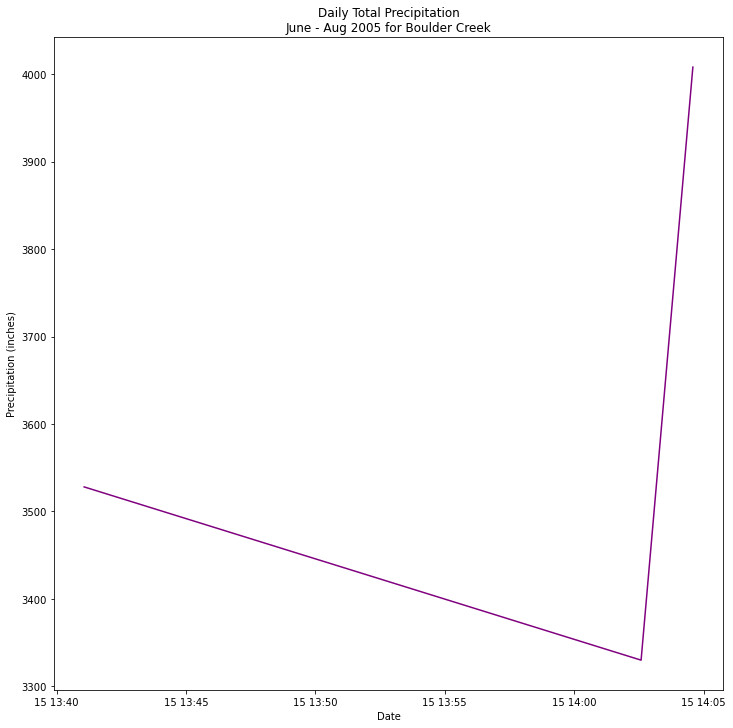

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
%matplotlib inline


# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.plot(df['timestamp'].values,
       df['geo_altitude'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nJune - Aug 2005 for Boulder Creek")